In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/dataset/Book1.csv"
df = pd.read_csv(path)
print('****'*10)
print(f'Dataframe has {df.shape[0]} Rows, {df.shape[1]} Columns')
print('****'*10)

df.head().style.set_properties(**{'background-color': '#A2DBFA',
                                    'color': 'black',
                                    'border': '1.5px  solid black'}).bar(color='#F3F1F5',
                                                                         vmin=100_000,
                                                                        )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
****************************************
Dataframe has 320000 Rows, 15 Columns
****************************************


,Surface_type_cold,Surface_type_hot,Mass_cold,Mass_hot,Temperature_cold_in,Temperature_hot_in,Heat_load,Height,Depth,Width,Temperature_h_out,Temperature_c_out,effectiveness,pressure_drop_cold,pressure_drop_hot
0,1,1,0.558824,0.558824,58.627500,320.000000,132.843000,0.251800,0.060492,0.548387,129.503000,252.215000,0.740656,0.037894,0.384866
1,1,2,0.558824,0.558824,58.627500,320.000000,132.843000,0.251800,0.060492,0.548387,125.747000,256.032000,0.755262,0.024410,0.919176
2,1,3,0.558824,0.558824,58.627500,320.000000,132.843000,0.251800,0.060492,0.548387,124.430000,257.370000,0.760380,0.020632,1.385330
3,1,4,0.558824,0.558824,58.627500,320.000000,132.843000,0.251800,0.060492,0.548387,124.189000,257.616000,0.761321,0.020394,1.486110
4,2,1,0.558824,0.558824,58.627500,320.000000,132.843000,0.251800,0.060492,0.548387,121.756000,260.088000,0.770779,0.061813,0.284414


In [ ]:
df.drop(columns=['Height'],inplace=True)
df.drop(columns=["Surface_type_cold","Surface_type_hot"]).describe().T.style.bar(subset=['mean'], color='#E68193')\
                            .background_gradient(subset=['std'], cmap='Accent_r')\
                             .background_gradient(subset=['50%'], cmap='Accent')



,count,mean,std,min,25%,50%,75%,max
Mass_cold,320000.000000,0.548544,0.028381,0.500000,0.523529,0.549020,0.573529,0.597059
Mass_hot,320000.000000,0.548448,0.028209,0.500000,0.524510,0.548039,0.573529,0.597059
Temperature_cold_in,320000.000000,59.686569,5.674133,50.000000,54.705900,59.607800,64.705900,69.411800
Temperature_hot_in,320000.000000,358.527642,33.850897,300.000000,329.412000,358.824000,387.059000,416.471000
Heat_load,320000.000000,124.175142,14.180745,100.000000,111.765000,124.020000,136.275000,148.529000
Depth,320000.000000,0.038814,0.014637,0.011914,0.026522,0.037964,0.049613,0.076762
Width,320000.000000,0.937585,0.387105,0.511278,0.623853,0.809524,1.152540,2.000000
Temperature_h_out,320000.000000,132.428165,16.333715,79.937300,120.936750,131.679000,143.136250,210.556000
Temperature_c_out,320000.000000,289.297136,28.327675,208.407000,266.324750,288.928000,311.745250,366.549000
effectiveness,320000.000000,0.768320,0.036578,0.614035,0.744939,0.770526,0.794234,0.867487


Text(0.6, 0.95, 'correlation')

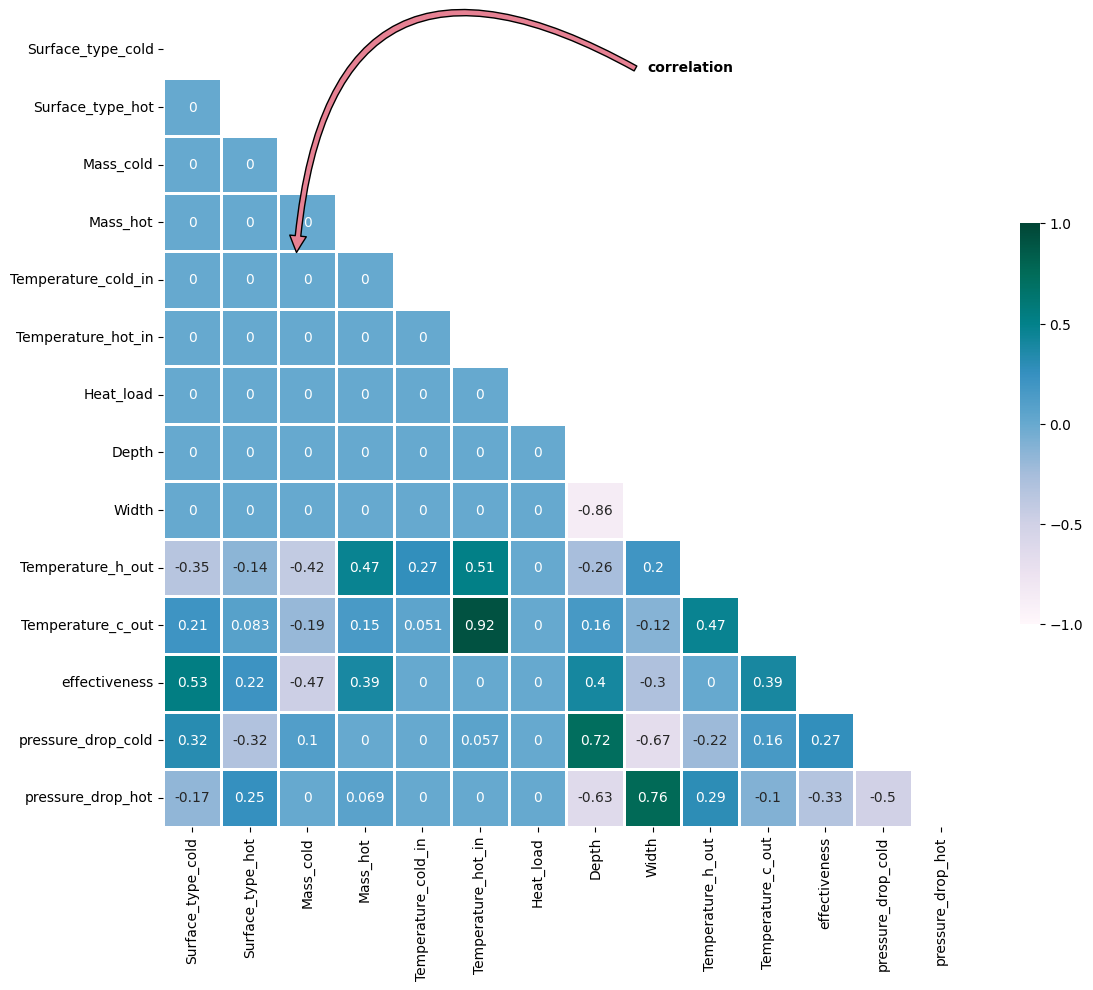

In [ ]:

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]= True


fig, ax = plt.subplots(figsize=(13, 13))
corr_matrix = df.corr()
corr_matrix[(abs(corr_matrix) < 0.05) & (abs(corr_matrix) > 0)]=0
# corr_matrix[(corr_matrix < -(1e-5)) ]=0
heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = 0.8,
                      cmap = 'PuBuGn',
                      cbar_kws = {'shrink': .4,"ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})

#add the column names as labels
ax.set_yticklabels(df.corr(), rotation = 0)
ax.set_xticklabels(df.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

ax.annotate('correlation',
                    fontsize=10,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor="#E68193", shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)
# print(ax)
# ax.set_title('Correlation of Features', size = 22, color = "#0A4361", weight='bold', pad=20)

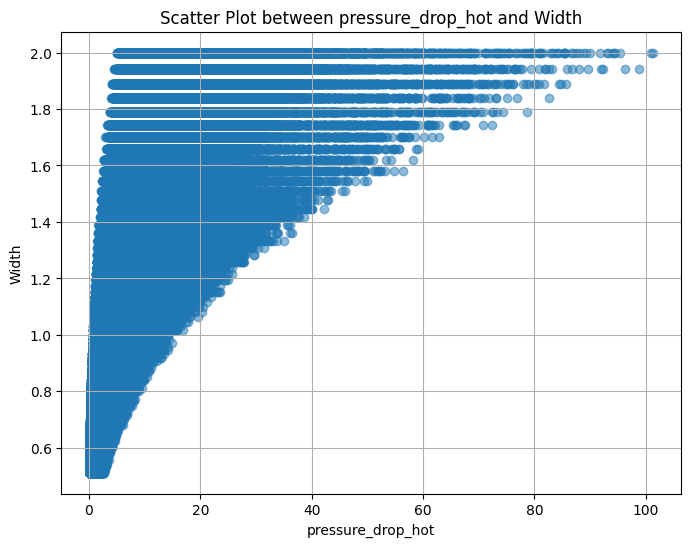

In [ ]:
import matplotlib.pyplot as plt
def scatter_plot(df, x_col, y_col):
    """
    Plot a scatter plot between two columns of a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        x_col (str): The name of the column to be plotted on the x-axis.
        y_col (str): The name of the column to be plotted on the y-axis.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot between {x_col} and {y_col}')
    plt.grid(True)
    plt.show()
scatter_plot(df,"pressure_drop_hot", "Width")

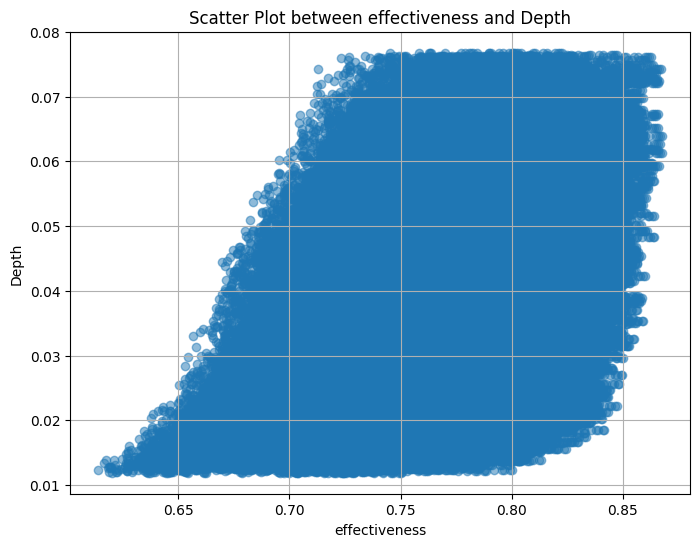

In [ ]:
scatter_plot(df,"effectiveness", "Depth")

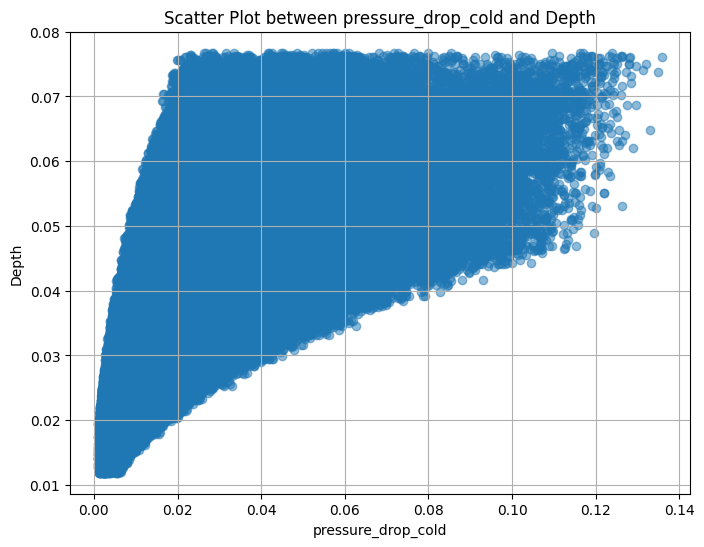

In [ ]:
scatter_plot(df,"pressure_drop_cold", "Depth")

In [ ]:
X = df.drop('effectiveness', axis=1)
y = df['effectiveness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
4000/4000 [==============================] - 32s 7ms/step - loss: 0.9386 - mae: 0.1782 - val_loss: 0.0016 - val_mae: 0.0327
Epoch 2/10
4000/4000 [==============================] - 16s 4ms/step - loss: 0.0331 - mae: 0.1225 - val_loss: 0.0016 - val_mae: 0.0334
Epoch 3/10
4000/4000 [==============================] - 16s 4ms/step - loss: 0.0657 - mae: 0.0697 - val_loss: 7.9286e-04 - val_mae: 0.0227
Epoch 4/10
4000/4000 [==============================] - 16s 4ms/step - loss: 0.0034 - mae: 0.0453 - val_loss: 1.5541e-04 - val_mae: 0.0101
Epoch 5/10
4000/4000 [==============================] - 17s 4ms/step - loss: 6.9691e-04 - mae: 0.0196 - val_loss: 3.4219e-04 - val_mae: 0.0178
Epoch 6/10
4000/4000 [==============================] - 16s 4ms/step - loss: 0.0032 - mae: 0.0138 - val_loss: 3.8642e-05 - val_mae: 0.0049
Epoch 7/10
4000/4000 [==============================] - 17s 4ms/step - loss: 3.8547e-05 - mae: 0.0048 - val_loss: 1.6801e-05 - val_mae: 0.0033
Epoch 8/10
4000/4000 [=====

In [ ]:
# Get the weights of the model
weights = model.get_weights()

# Loop through each layer's weights
for i, layer_weights in enumerate(weights):
    print("Layer", i)
    print("Weights shape:", layer_weights.shape)
    print("Weights:", layer_weights)


Layer 0
Weights shape: (13, 256)
Weights: [[ 0.14438888  0.01578787  0.11047344 ...  0.06744106  0.07897341
  -0.01835502]
 [ 0.11543316 -0.08420168 -0.16935751 ... -0.00561302  0.01280028
  -0.16197821]
 [-0.02228653  0.00623228 -0.08555381 ...  0.08773669  0.1260221
  -0.30216482]
 ...
 [-0.09304801 -0.12605399  0.0170587  ...  0.06773682 -0.01054607
  -0.07745092]
 [-0.0462136  -0.04645932 -0.39381734 ...  0.07214653 -0.0545491
  -0.57679766]
 [-0.06056382  0.0677518   0.03621658 ... -0.12626399 -0.135457
  -0.01264952]]
Layer 1
Weights shape: (256,)
Weights: [ 0.00000000e+00  0.00000000e+00 -2.54811943e-01 -1.18624665e-01
 -1.09031796e-01 -1.43736294e-02  0.00000000e+00  0.00000000e+00
 -7.99402315e-03  2.04103384e-02  0.00000000e+00 -3.95459272e-02
 -3.26615898e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.13260128e-01  0.00000000e+00 -4.69865948e-02
 -1.91078782e-01 -5.90853207e-02 -1.67724229e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000

In [ ]:

import numpy as np

def predict_output(model, input_data):


    input_data = np.array(input_data)

    # output
    output = model.predict(input_data)

    return output
input_data = np.array([[1,1,0.558824,0.558824,58.6275,320,132.843,0.0604918,0.548387,129.503,252.215,0.0378941,0.384866]])
predict_output(model,input_data)

1/1 [==============================] - 0s 61ms/step


array([[0.7356869]], dtype=float32)

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Initialize the LightGBM regressor
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=100,
    max_depth=200,
    learning_rate=0.0001,
    n_estimators=1000
)

# Train the model
lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mse')



# Predict on the validation set
y_pred = lgb_model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1891
[LightGBM] [Info] Number of data points in the train set: 256000, number of used features: 13
[LightGBM] [Info] Start training from score 0.768282
Mean Squared Error: 0.0011327506566971225


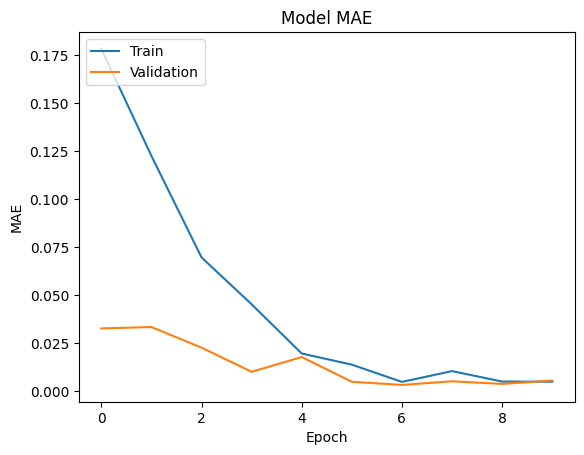

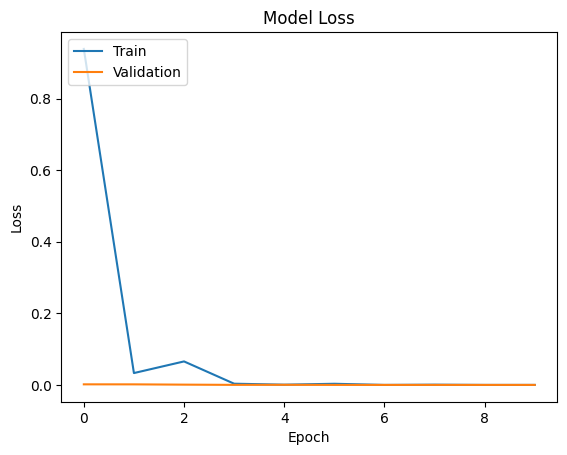

In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def scatter_plot(df, x_col, y_col):
    """
    Plot a scatter plot between two columns of a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        x_col (str): The name of the column to be plotted on the x-axis.
        y_col (str): The name of the column to be plotted on the y-axis.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], alpha=0.5)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot between {x_col} and {y_col}')
    plt.grid(True)
    plt.show()

In [ ]:
scatter_plot(df, "Mass_hot", "Pressure")

KeyError: 'Pressure'

<Figure size 800x600 with 0 Axes>

In [ ]:
scatter_plot(df, "effectiveness", "Surface_type_hot")

In [ ]:
scatter_plot(df, "pressure_drop_cold", "Depth")

In [ ]:
scatter_plot(df,"effectiveness", "Mass_cold")

In [ ]:
scatter_plot(df, "effectiveness", "Mass_hot")

In [ ]:
sns.distplot(df['effectiveness'], label='Effectiveness')
plt.xlabel('Effectiveness')
plt.ylabel('Mass_hot')
plt.legend()
plt.show()

In [ ]:
scatter_plot(df, "effectiveness", "Mass_hot")